In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline
from scipy.stats import chi2_contingency


recruitment_data = pd.read_csv("data/recruitment_data.csv")
employee_data = pd.read_csv("data/employee_data.csv") 
survey_data = pd.read_csv("data/employee_engagement_survey_data.csv")


In [5]:
employee_data.head()

EmpID FirstName LastName  StartDate ExitDate                    Title  \
0   3427     Uriah  Bridges  20-Sep-19      NaN  Production Technician I   
1   3428     Paula    Small  11-Feb-23      NaN  Production Technician I   
2   3429    Edward     Buck  10-Dec-18      NaN       Area Sales Manager   
3   3430   Michael  Riordan  21-Jun-21      NaN       Area Sales Manager   
4   3431   Jasmine    Onque  29-Jun-19      NaN       Area Sales Manager   

        Supervisor                        ADEmail BusinessUnit EmployeeStatus  \
0     Peter Oneill    uriah.bridges@bilearner.com         CCDR         Active   
1  Renee Mccormick      paula.small@bilearner.com           EW         Active   
2   Crystal Walker      edward.buck@bilearner.com           PL         Active   
3   Rebekah Wright  michael.riordan@bilearner.com         CCDR         Active   
4        Jason Kim    jasmine.onque@bilearner.com          TNS         Active   

   ...              Division         DOB State JobFunctionDescription  \
0  ...  Finance & Accounting  07-10-1969    MA             Accounting   
1  ...                Aerial  30-08-1965    MA                  Labor   
2  ...         General - Sga  06-10-1991    MA              Assistant   
3  ...  Finance & Accounting  04-04-1998    ND                  Clerk   
4  ...         General - Con  29-08-1969    FL                Laborer   

  GenderCode LocationCode  RaceDesc MaritalDesc Performance Score  \
0     Female        34904     White     Widowed       Fully Meets   
1       Male         6593  Hispanic     Widowed       Fully Meets   
2       Male         2330  Hispanic     Widowed       Fully Meets   
3       Male        58782     Other      Single       Fully Meets   
4     Female        33174     Other     Married       Fully Meets   

  Current Employee Rating  
0                       4  
1                       3  
2                       4  
3                       2  
4                       3  

[5 rows x 26 columns]

In [6]:
survey_data.head()


Employee ID Survey Date  Engagement Score  Satisfaction Score  \
0         1001  10-10-2022                 2                   5   
1         1002  03-08-2023                 4                   5   
2         1003  03-01-2023                 2                   5   
3         1004  30-07-2023                 3                   5   
4         1005  19-06-2023                 2                   4   

   Work-Life Balance Score  
0                        5  
1                        3  
2                        2  
3                        3  
4                        5

In [7]:
df = employee_data.merge(survey_data, left_on='EmpID', right_on='Employee ID', how='left')
df.drop(columns=['Employee ID'], inplace=True)
df.head()


EmpID FirstName LastName  StartDate ExitDate                    Title  \
0   3427     Uriah  Bridges  20-Sep-19      NaN  Production Technician I   
1   3428     Paula    Small  11-Feb-23      NaN  Production Technician I   
2   3429    Edward     Buck  10-Dec-18      NaN       Area Sales Manager   
3   3430   Michael  Riordan  21-Jun-21      NaN       Area Sales Manager   
4   3431   Jasmine    Onque  29-Jun-19      NaN       Area Sales Manager   

        Supervisor                        ADEmail BusinessUnit EmployeeStatus  \
0     Peter Oneill    uriah.bridges@bilearner.com         CCDR         Active   
1  Renee Mccormick      paula.small@bilearner.com           EW         Active   
2   Crystal Walker      edward.buck@bilearner.com           PL         Active   
3   Rebekah Wright  michael.riordan@bilearner.com         CCDR         Active   
4        Jason Kim    jasmine.onque@bilearner.com          TNS         Active   

   ... GenderCode LocationCode  RaceDesc MaritalDesc Performance Score  \
0  ...     Female        34904     White     Widowed       Fully Meets   
1  ...       Male         6593  Hispanic     Widowed       Fully Meets   
2  ...       Male         2330  Hispanic     Widowed       Fully Meets   
3  ...       Male        58782     Other      Single       Fully Meets   
4  ...     Female        33174     Other     Married       Fully Meets   

  Current Employee Rating Survey Date Engagement Score Satisfaction Score  \
0                       4  14-01-2023                1                  2   
1                       3  09-09-2022                2                  1   
2                       4  27-05-2023                1                  2   
3                       2  16-06-2023                5                  5   
4                       3  25-11-2022                2                  5   

  Work-Life Balance Score  
0                       3  
1                       5  
2                       1  
3                       4  
4                       3  

[5 rows x 30 columns]

In [8]:
df.shape
df.columns


Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating', 'Survey Date', 'Engagement Score',
       'Satisfaction Score', 'Work-Life Balance Score'],
      dtype='object')

**1. Data preparation and cleaning**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType             3000 non-null   obje

In [10]:
df[['ExitDate', 'TerminationDescription']].isnull().sum()


ExitDate                  1467
TerminationDescription    1467
dtype: int64

In [11]:
df['Age'] = df['DOB'].apply(lambda x: (datetime.now() - datetime.strptime(x, '%d-%m-%Y')).days // 365)
df[['DOB','Age']].head()


DOB  Age
0  07-10-1969   55
1  30-08-1965   59
2  06-10-1991   33
3  04-04-1998   26
4  29-08-1969   55

In [12]:
# Convert both StartDate and ExitDate to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['ExitDate'] = pd.to_datetime(df['ExitDate'])

# Calculate seniority using ExitDate for terminated employees and current date for current employees
df['Seniority'] = df.apply(lambda x: 
    ((x['ExitDate'] if pd.notna(x['ExitDate']) else datetime.now()) - x['StartDate']).days / 365.25,
    axis=1
)

# Round to 2 decimal places
df['Seniority'] = df['Seniority'].round(2)

# Check the results
print(df[['StartDate', 'ExitDate', 'Seniority']].head(10))

   StartDate   ExitDate  Seniority
0 2019-09-20        NaT       5.28
1 2023-02-11        NaT       1.89
2 2018-12-10        NaT       6.06
3 2021-06-21        NaT       3.53
4 2019-06-29        NaT       5.51
5 2020-01-17        NaT       4.96
6 2022-04-06 2023-07-03       1.24
7 2020-11-06 2023-01-29       2.23
8 2018-08-18        NaT       6.37
9 2022-01-21 2023-06-29       1.43


C:\Users\Ana Belen\AppData\Local\Temp\ipykernel_980\561936157.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['StartDate'] = pd.to_datetime(df['StartDate'])
C:\Users\Ana Belen\AppData\Local\Temp\ipykernel_980\561936157.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ExitDate'] = pd.to_datetime(df['ExitDate'])


**2. Descriptive statistics and visualizations**

**Profiling**

In [13]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Numerical columns**

In [14]:
numerical_columns = df[['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score']]
numerical_columns.agg(['mean', 'std'])

Engagement Score  Satisfaction Score  Work-Life Balance Score
mean          2.939667            3.022000                 2.989000
std           1.433426            1.408845                 1.409329

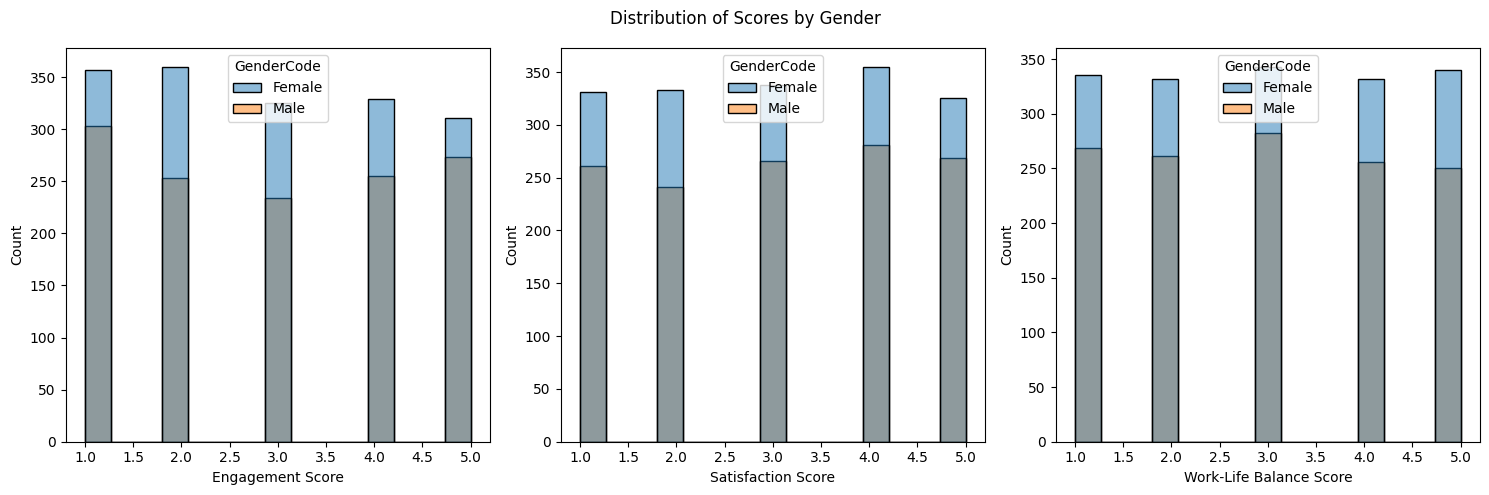

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Scores by Gender')

sns.histplot(data=df, x='Engagement Score', hue='GenderCode', multiple="layer", ax=axes[0])
sns.histplot(data=df, x='Satisfaction Score', hue='GenderCode', multiple="layer", ax=axes[1]) 
sns.histplot(data=df, x='Work-Life Balance Score', hue='GenderCode', multiple="layer", ax=axes[2])


plt.tight_layout()
plt.show()

**Categorical columns**

*Gender*

In [16]:
categorical_columns = df[['EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType', 'TerminationType', 'Division', 'Performance Score']]

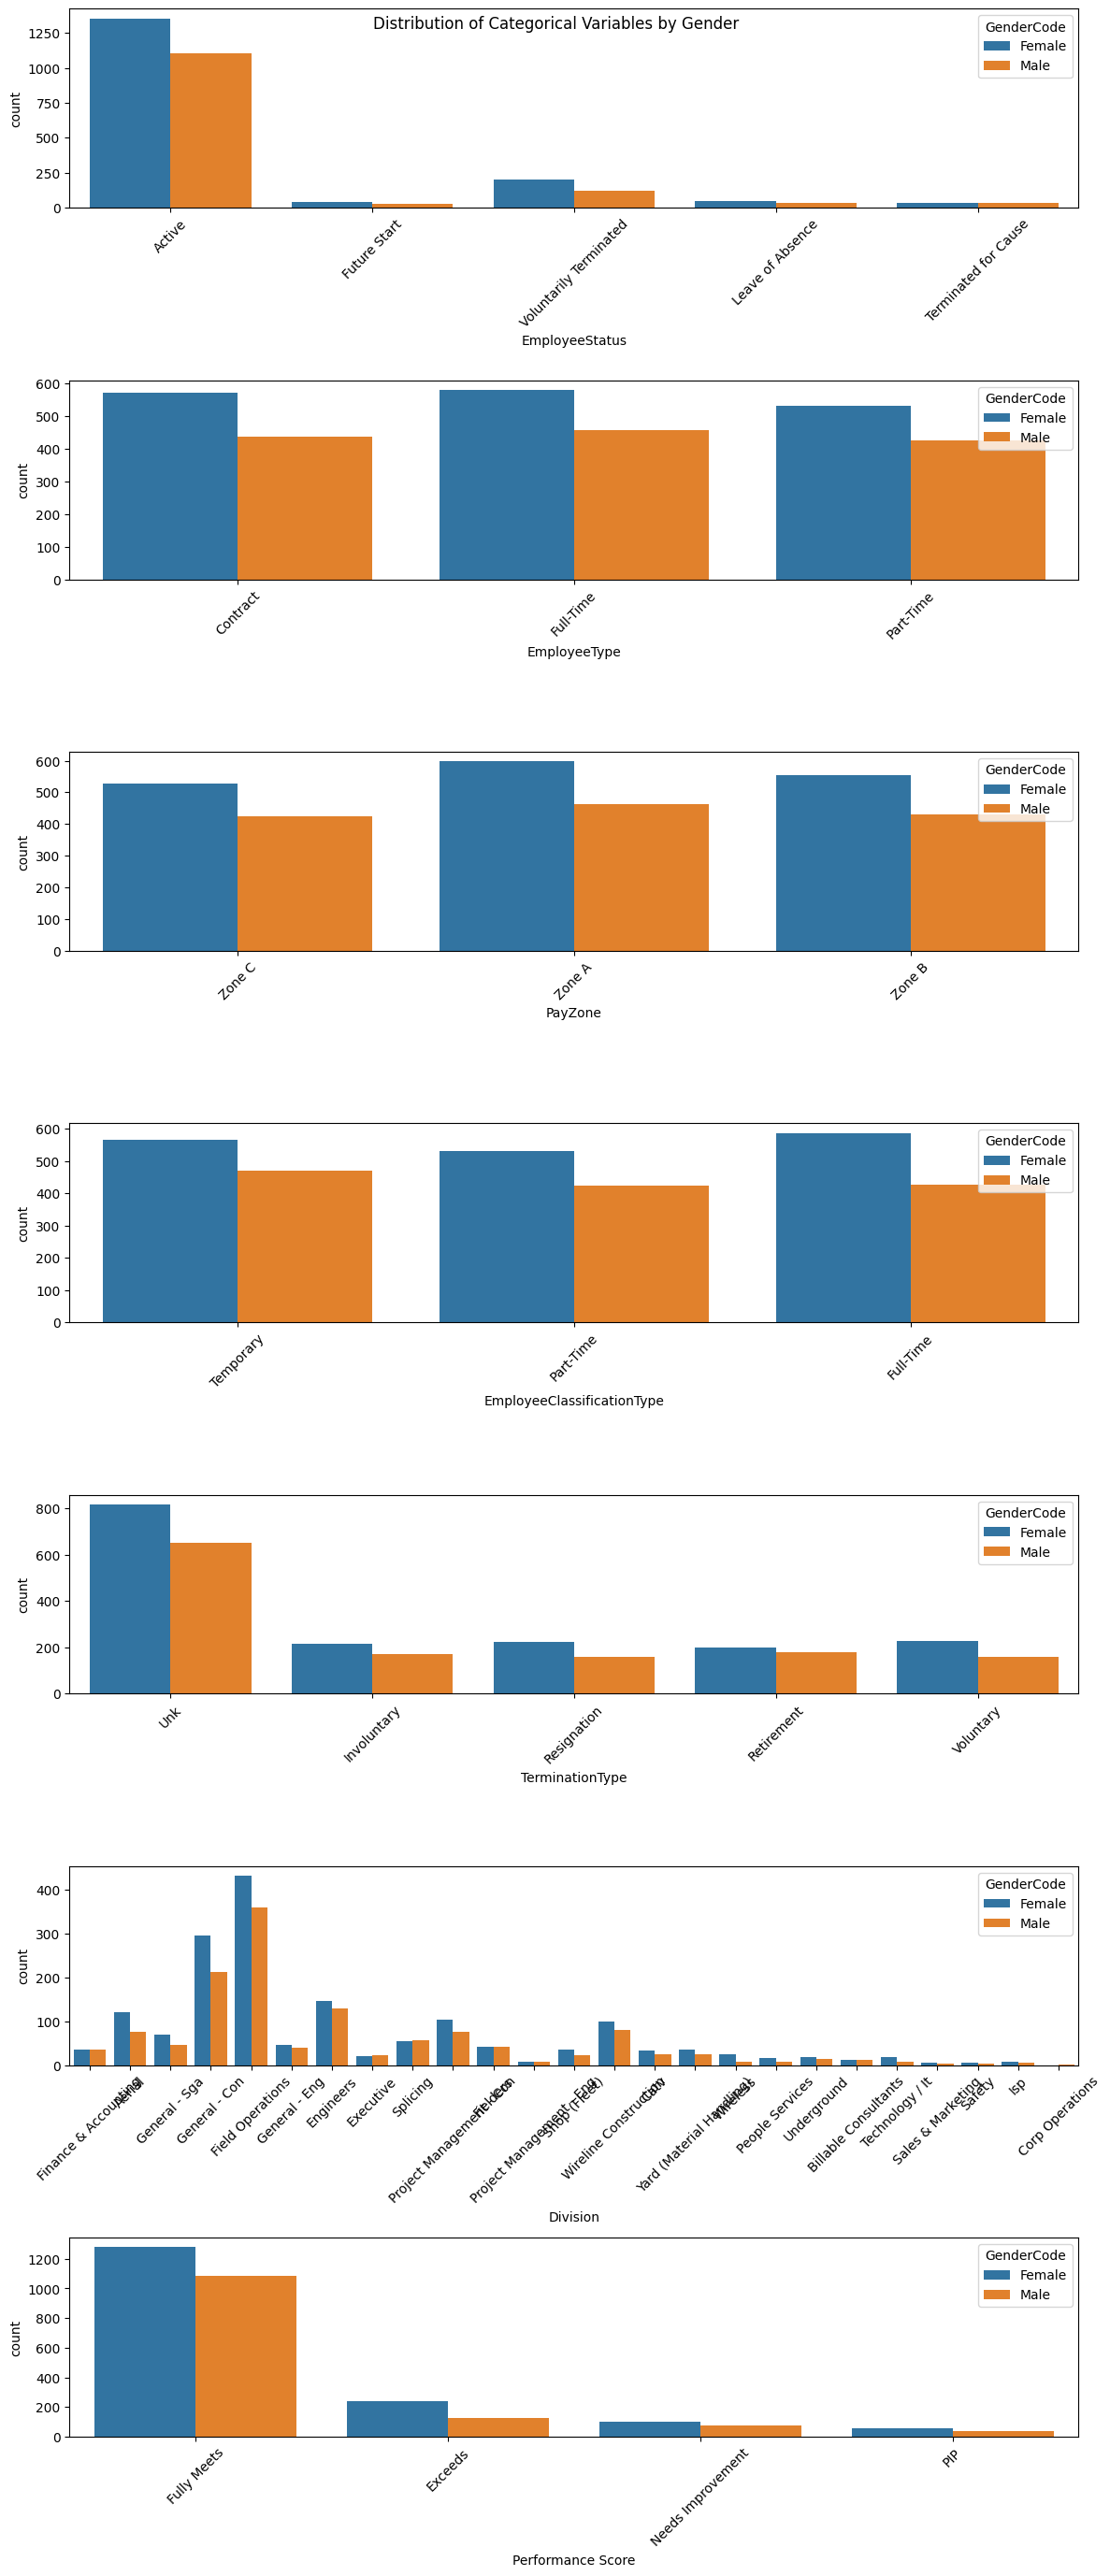

In [17]:
fig, axes = plt.subplots(len(categorical_columns.columns), 1, figsize=(12, 4*len(categorical_columns.columns)))
fig.suptitle('Distribution of Categorical Variables by Gender')

for i, col in enumerate(categorical_columns.columns):
    sns.countplot(x=col, hue='GenderCode', data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


*Race*

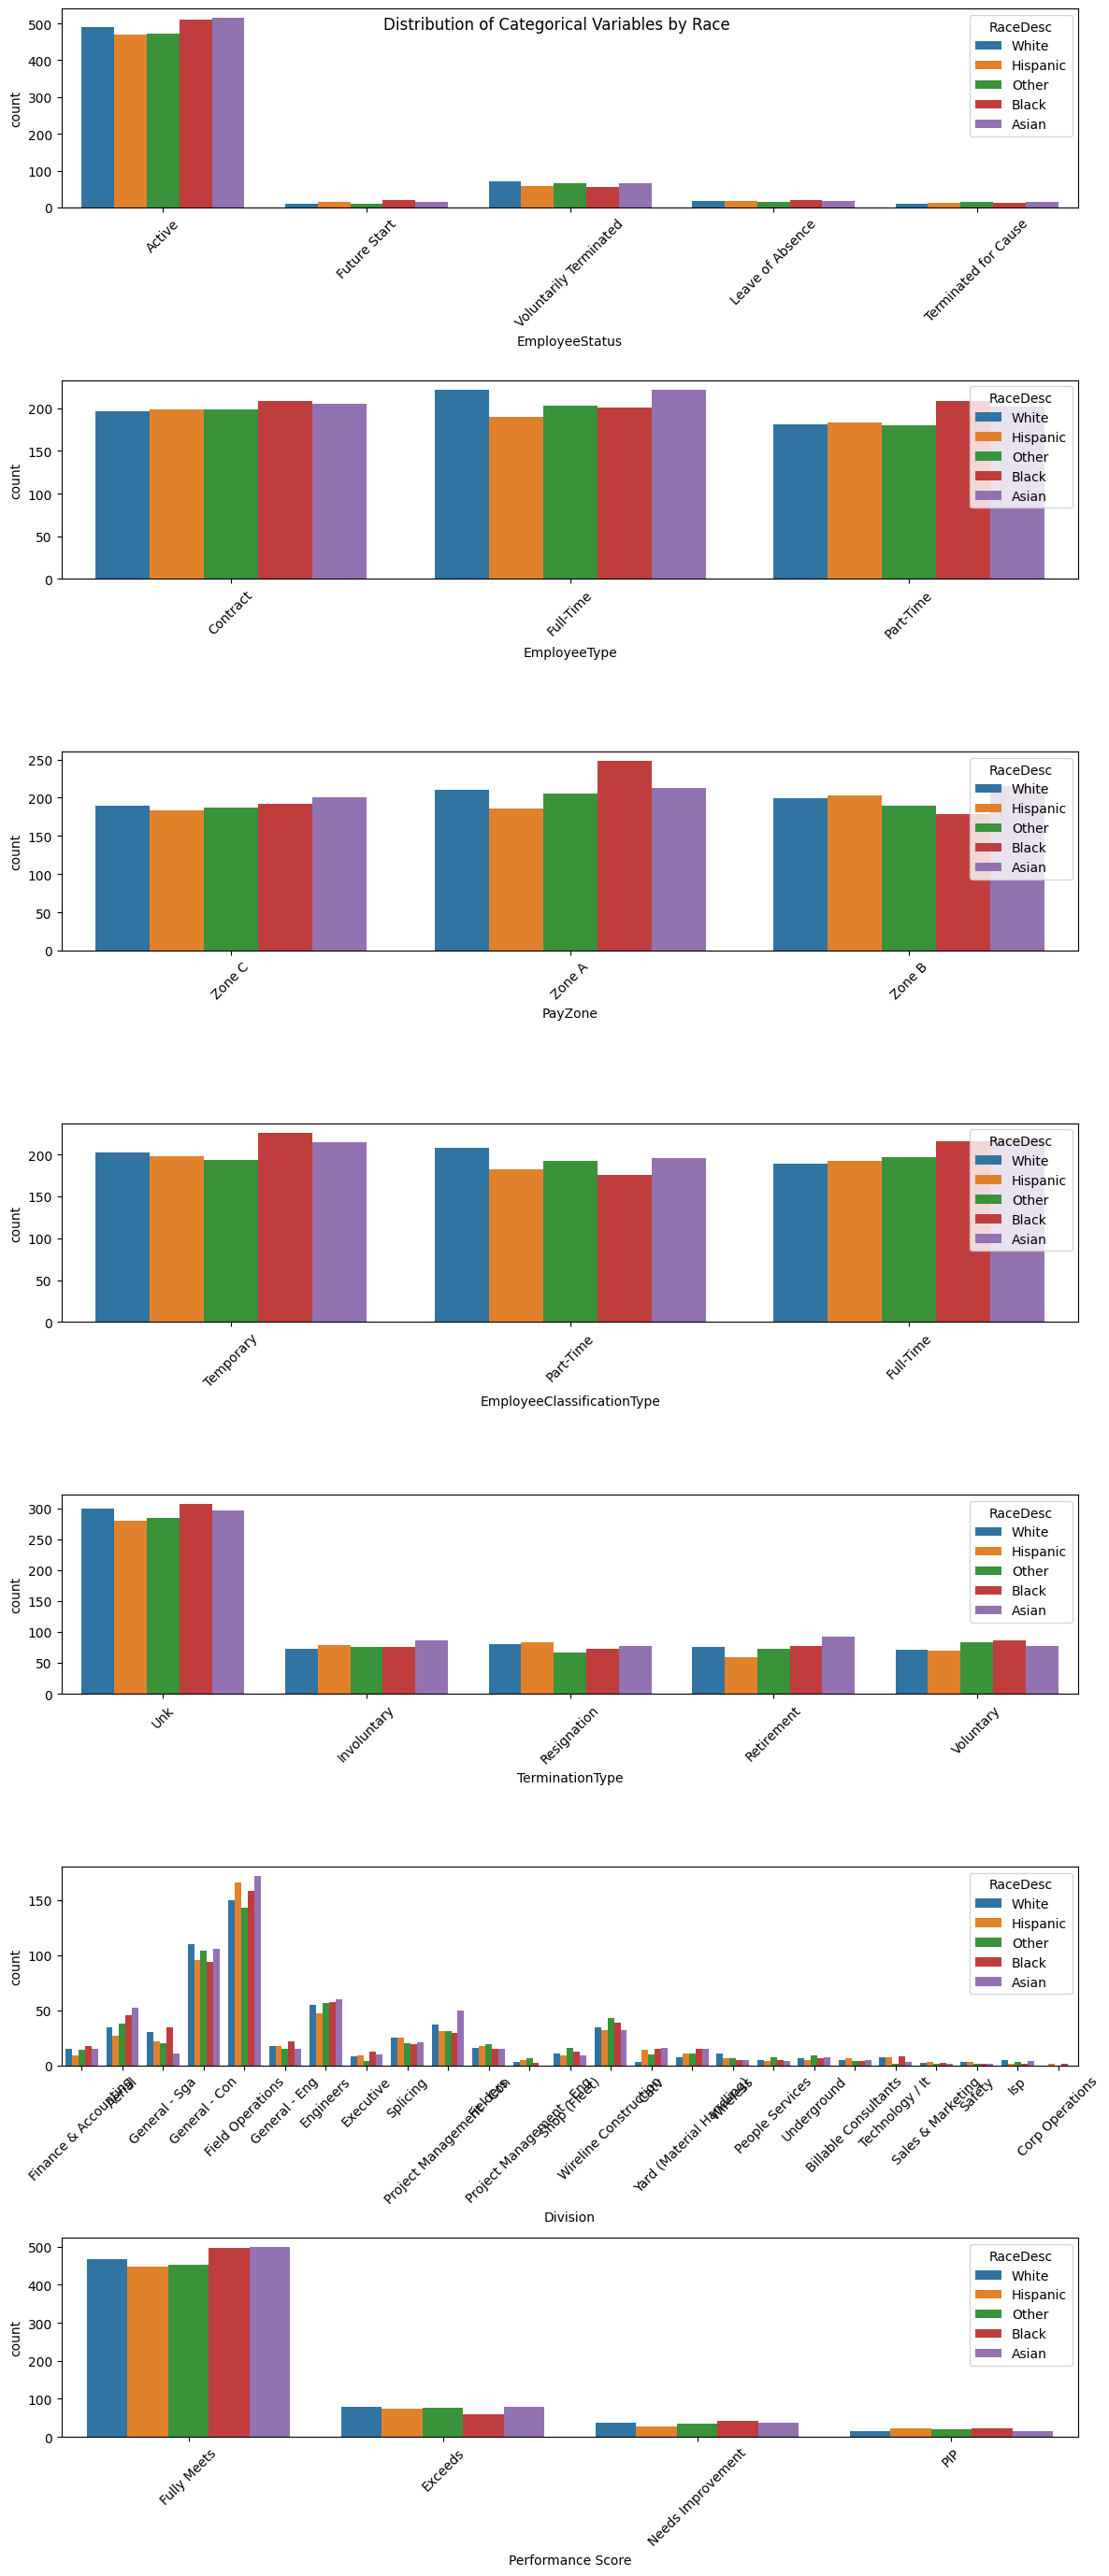

In [18]:
fig, axes = plt.subplots(len(categorical_columns.columns), 1, figsize=(12, 4*len(categorical_columns.columns)))
fig.suptitle('Distribution of Categorical Variables by Race')

for i, col in enumerate(categorical_columns.columns):
    sns.countplot(x=col, hue='RaceDesc', data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

*Marital Status*

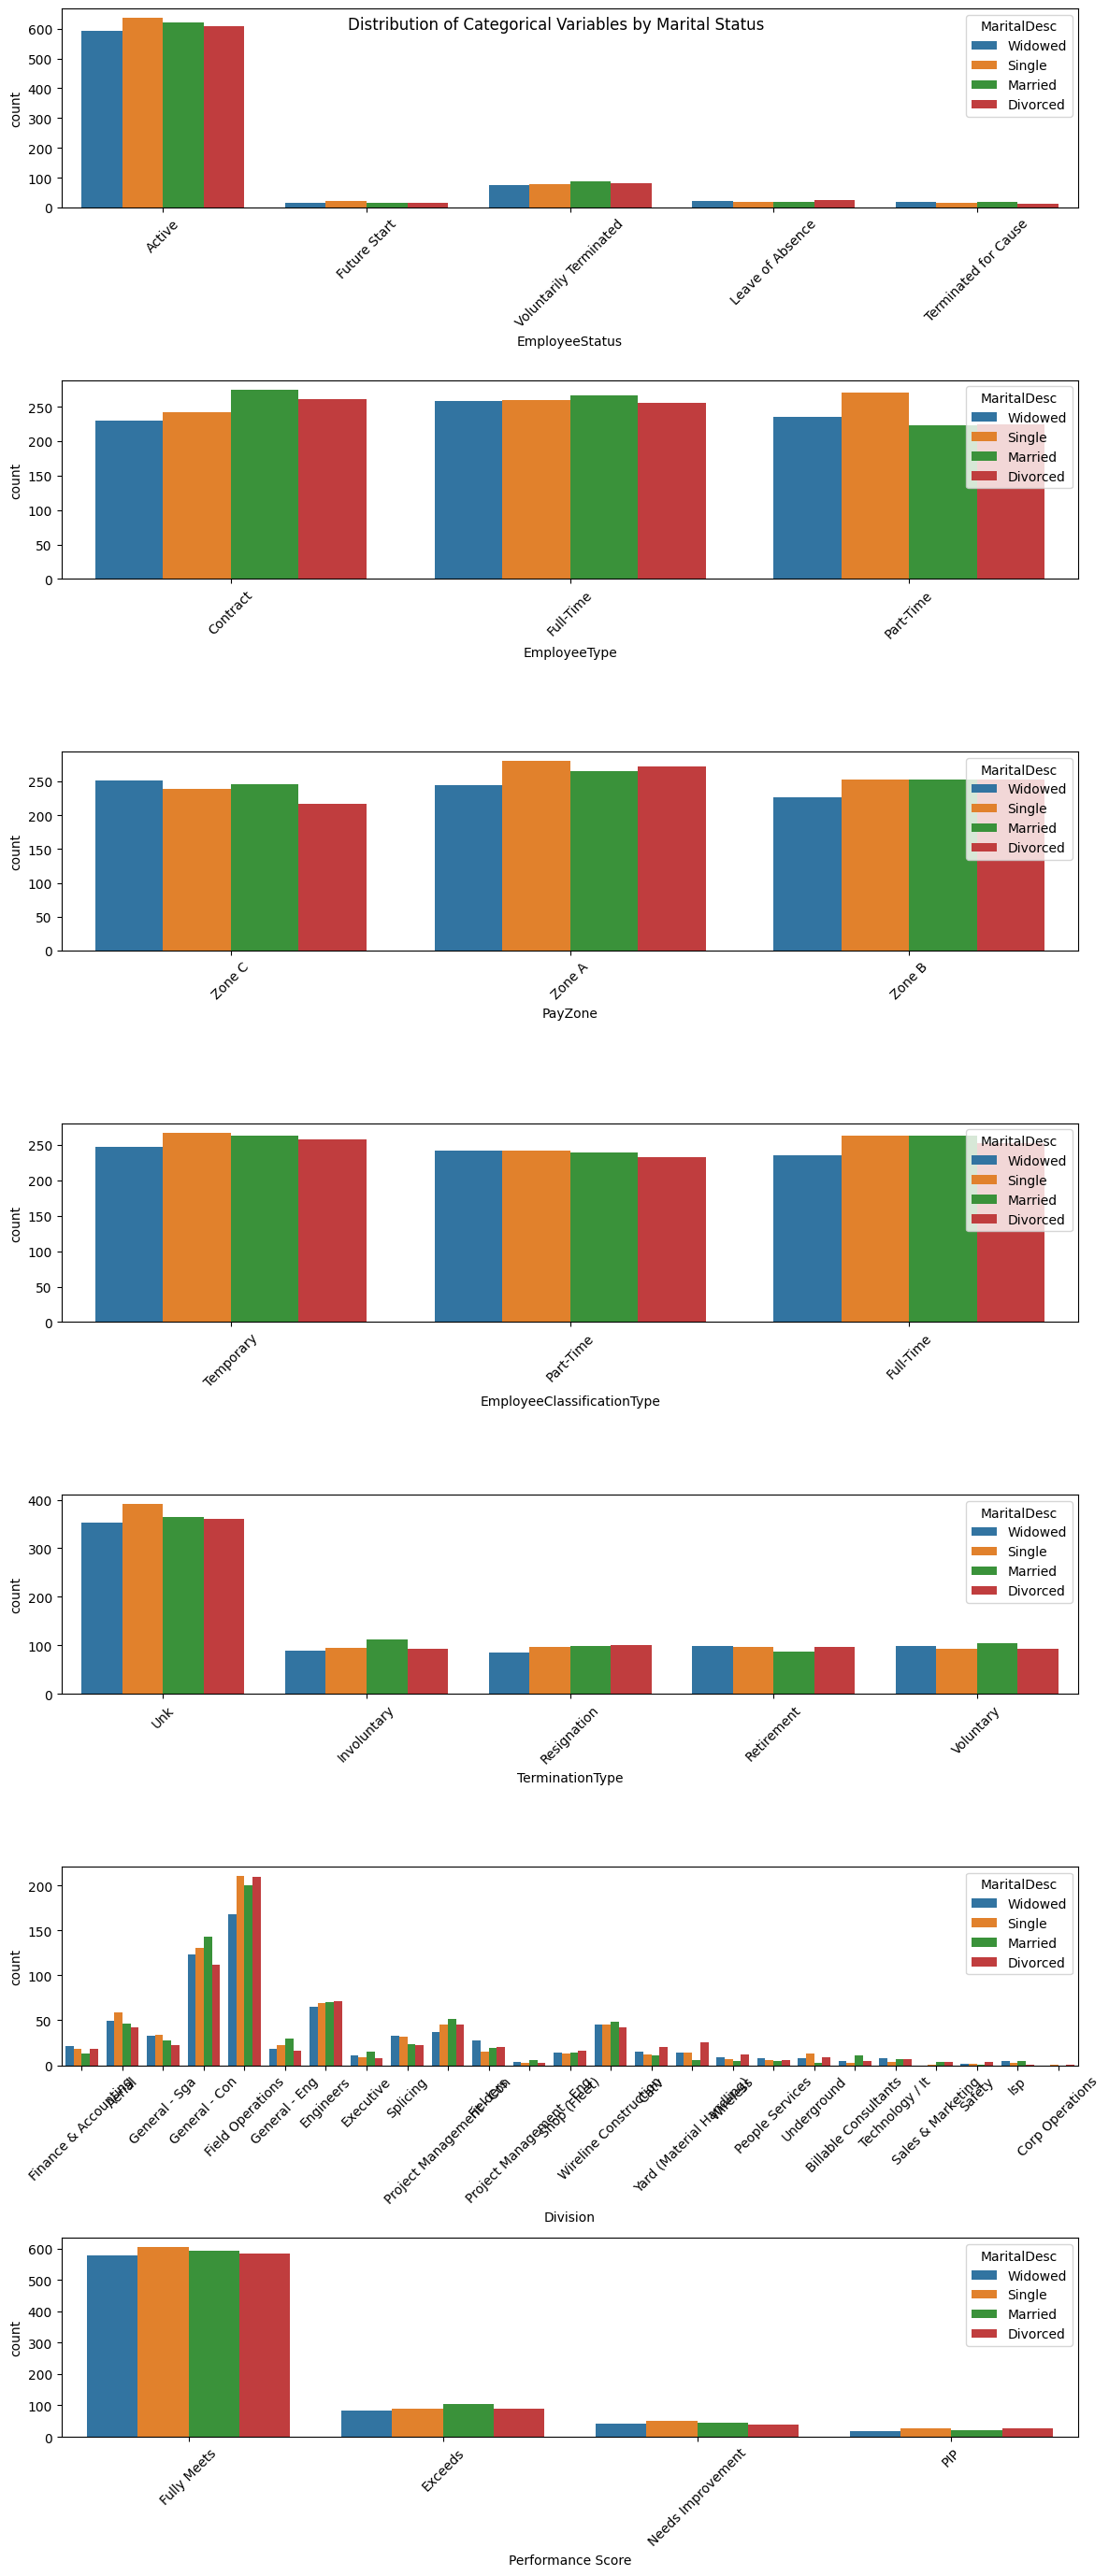

In [19]:
fig, axes = plt.subplots(len(categorical_columns.columns), 1, figsize=(12, 4*len(categorical_columns.columns)))
fig.suptitle('Distribution of Categorical Variables by Marital Status')

for i, col in enumerate(categorical_columns.columns):
    sns.countplot(x=col, hue='MaritalDesc', data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

*Age*

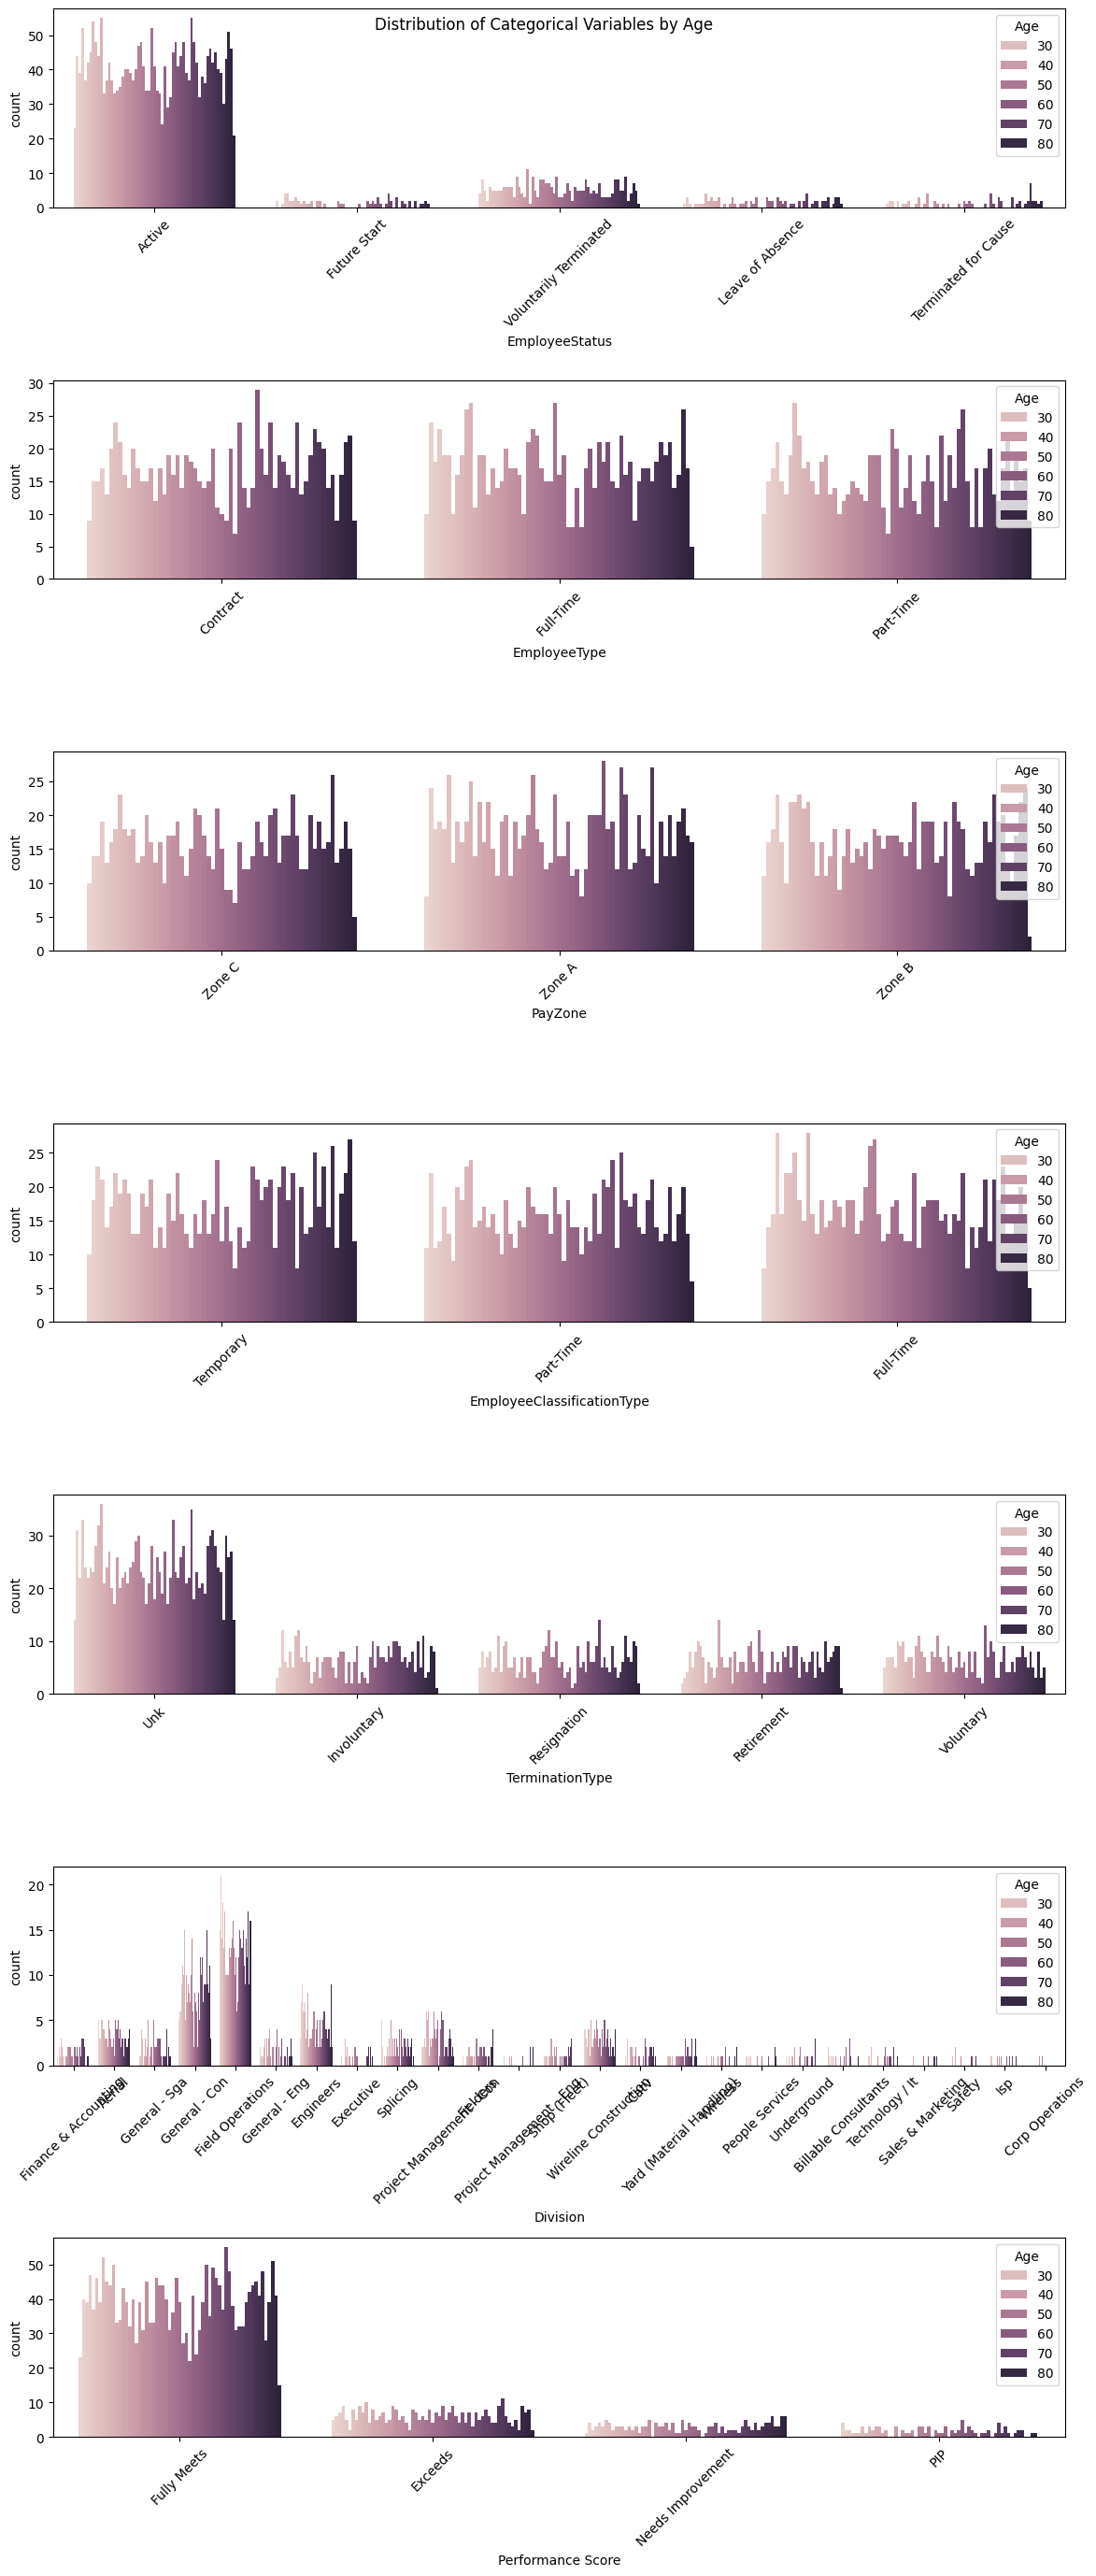

In [20]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])

fig, axes = plt.subplots(len(categorical_columns.columns), 1, figsize=(12, 4*len(categorical_columns.columns)))
fig.suptitle('Distribution of Categorical Variables by Age')

for i, col in enumerate(categorical_columns.columns):
    sns.countplot(x=col, hue='Age', data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

*Seniority*


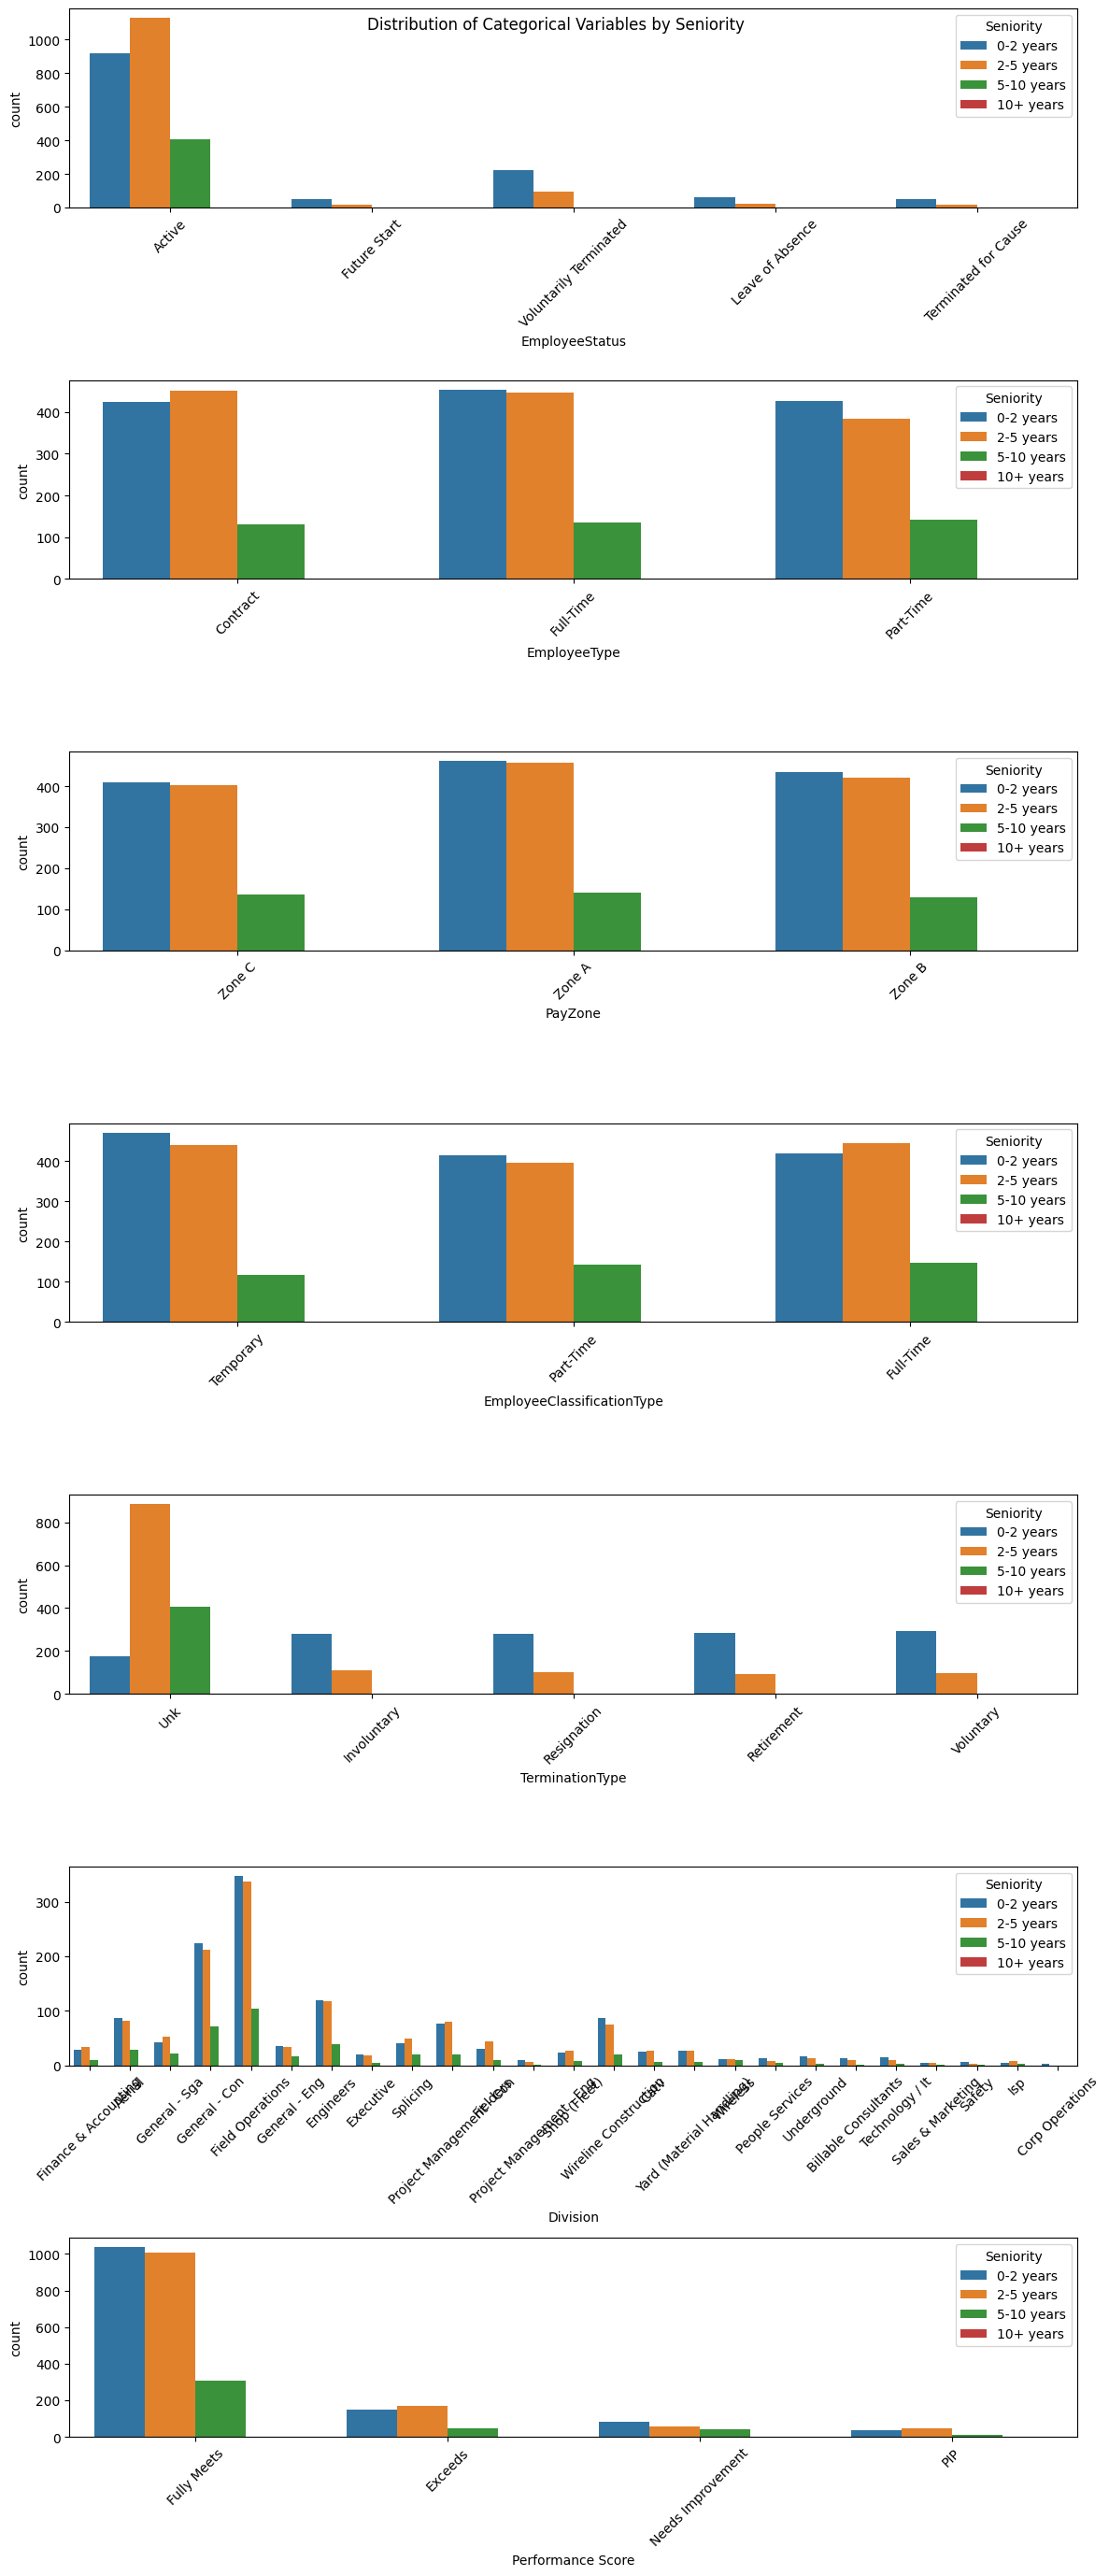

In [21]:
df['Seniority'] = pd.cut(df['Seniority'], 
                        bins=[0, 2, 5, 10, float('inf')],
                        labels=['0-2 years', '2-5 years', '5-10 years', '10+ years'])

fig, axes = plt.subplots(len(categorical_columns.columns), 1, figsize=(12, 4*len(categorical_columns.columns)))
fig.suptitle('Distribution of Categorical Variables by Seniority')

for i, col in enumerate(categorical_columns.columns):
    sns.countplot(x=col, hue='Seniority', data=df, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


**3. Correlation matrix**

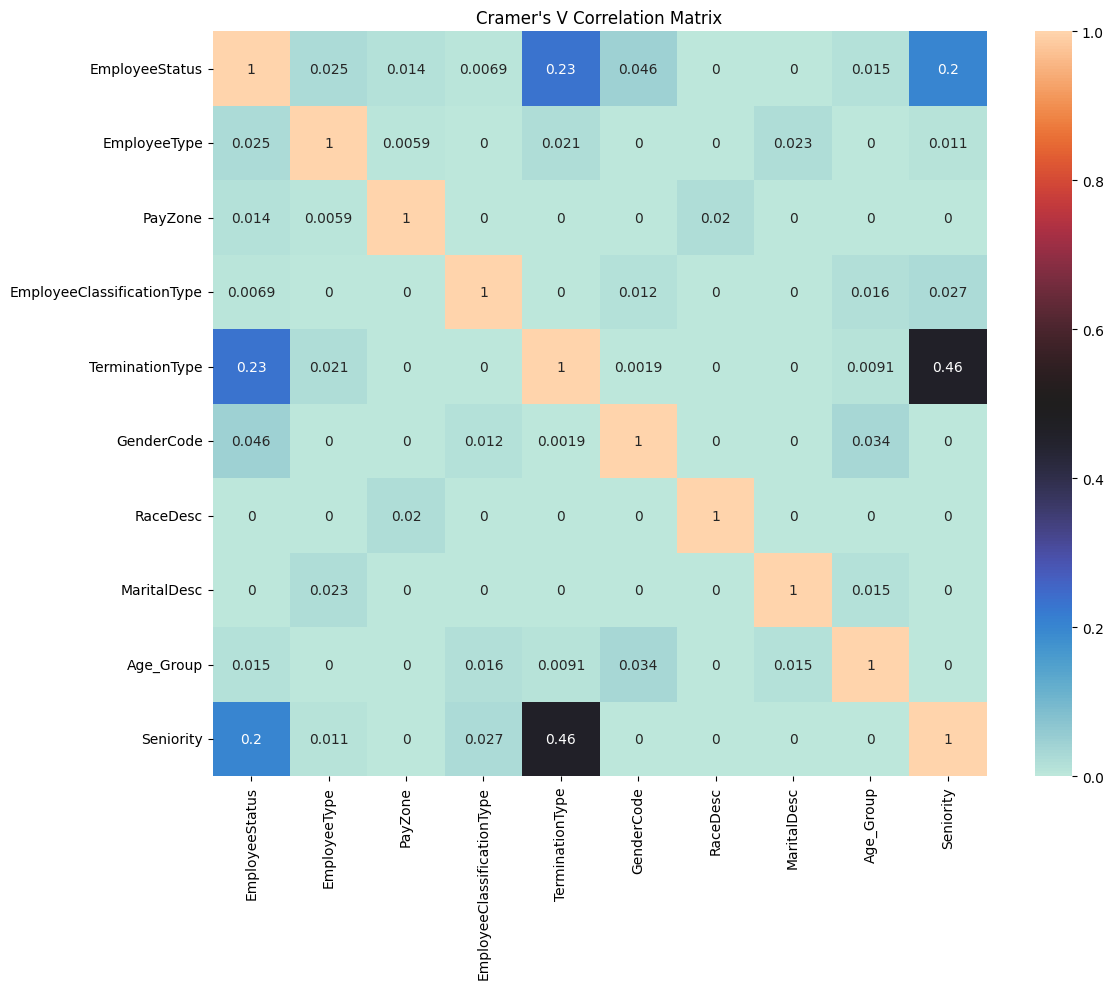

In [22]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p_value, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical_vars = ['EmployeeStatus', 'EmployeeType', 'PayZone', 
                   'EmployeeClassificationType', 'TerminationType',
                   'GenderCode', 'RaceDesc', 'MaritalDesc', 
                   'Age_Group', 'Seniority']

cramer_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars, dtype=float)

for i in categorical_vars:
    for j in categorical_vars:
        if i == j:
            cramer_matrix.loc[i,j] = 1.0
        else:
            cramer_matrix.loc[i,j] = cramers_v(df[i], df[j])

plt.figure(figsize=(12,10))
sns.heatmap(cramer_matrix, annot=True, center=0.5)
plt.title("Cramer's V Correlation Matrix")
plt.tight_layout()
plt.show()


In [23]:
status_mapping = {'Active': 0, 'Future Start': 1, 'Voluntarily Terminated': 2,
       'Leave of Absence': 3, 'Terminated for Cause': 4}

type_mapping = {'Full-Time': 0, 'Part-Time': 1, 'Temporary': 2, 'Seasonal': 3}

payzone_mapping = {'Zone A': 0, 'Zone B': 1, 'Zone C': 2}

employee_classification_mapping = {'Full-Time': 0, 'Part-Time': 1, 'Temporary': 2}

termination_mapping = {'Unk': 0, 'Involuntary': 1, 'Resignation': 2, 'Retirement': 3, 'Voluntary': 4}

gender_mapping = {'Male': 0, 'Female': 1}

race_mapping = {'White': 0, 'Black': 1, 'Asian': 2, 'Hispanic': 3, 'Other': 4}

marital_mapping = {'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3}

age_mapping = {'18-25': 0, '26-35': 1, '36-45': 2, '46-55': 3, '55+': 4}

seniority_mapping = {'0-2 years': 0, '2-5 years': 1, '5-10 years': 2, '10+ years': 3}



In [24]:
df['EmployeeStatus_Numeric'] = df['EmployeeStatus'].map(status_mapping)
df['EmployeeType_Numeric'] = df['EmployeeType'].map(type_mapping)
df['PayZone_Numeric'] = df['PayZone'].map(payzone_mapping)
df['EmployeeClassificationType_Numeric'] = df['EmployeeClassificationType'].map(employee_classification_mapping)
df['TerminationType_Numeric'] = df['TerminationType'].map(termination_mapping)
df['GenderCode_Numeric'] = df['GenderCode'].map(gender_mapping)
df['RaceDesc_Numeric'] = df['RaceDesc'].map(race_mapping)
df['MaritalDesc_Numeric'] = df['MaritalDesc'].map(marital_mapping)
df['Age_Group_Numeric'] = df['Age_Group'].map(age_mapping)
df['Seniority_Numeric'] = df['Seniority'].map(seniority_mapping)


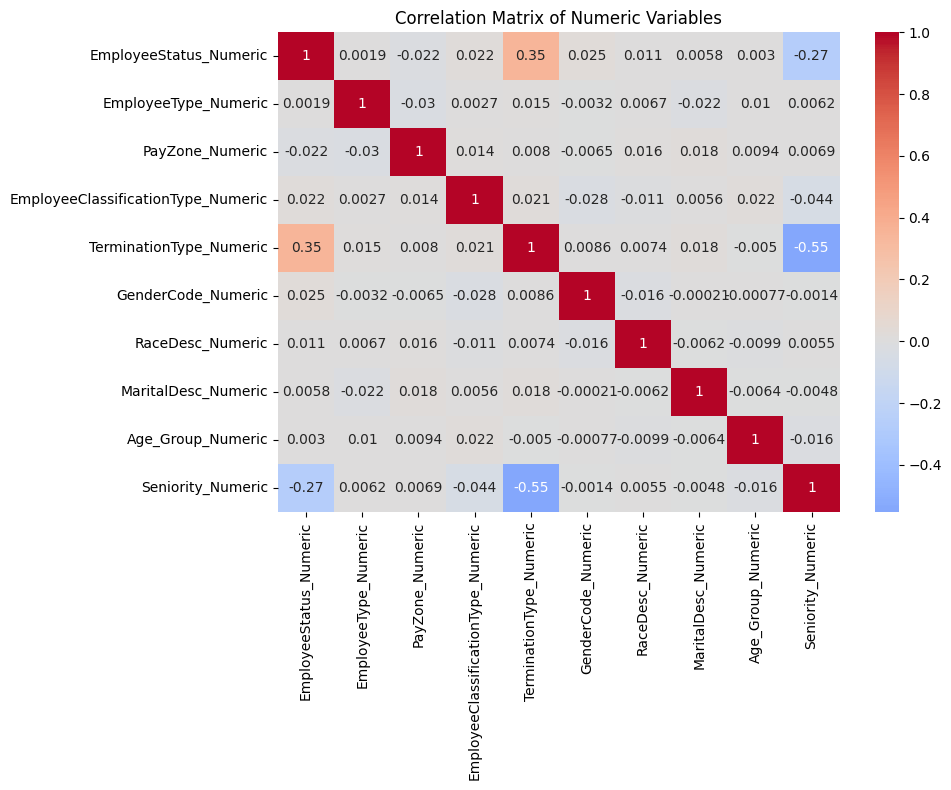

In [25]:
corr_columns = ['EmployeeStatus_Numeric', 'EmployeeType_Numeric', 'PayZone_Numeric', 'EmployeeClassificationType_Numeric', 'TerminationType_Numeric', 'GenderCode_Numeric', 'RaceDesc_Numeric', 'MaritalDesc_Numeric', 'Age_Group_Numeric', 'Seniority_Numeric']
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()


**4. Bias detection**


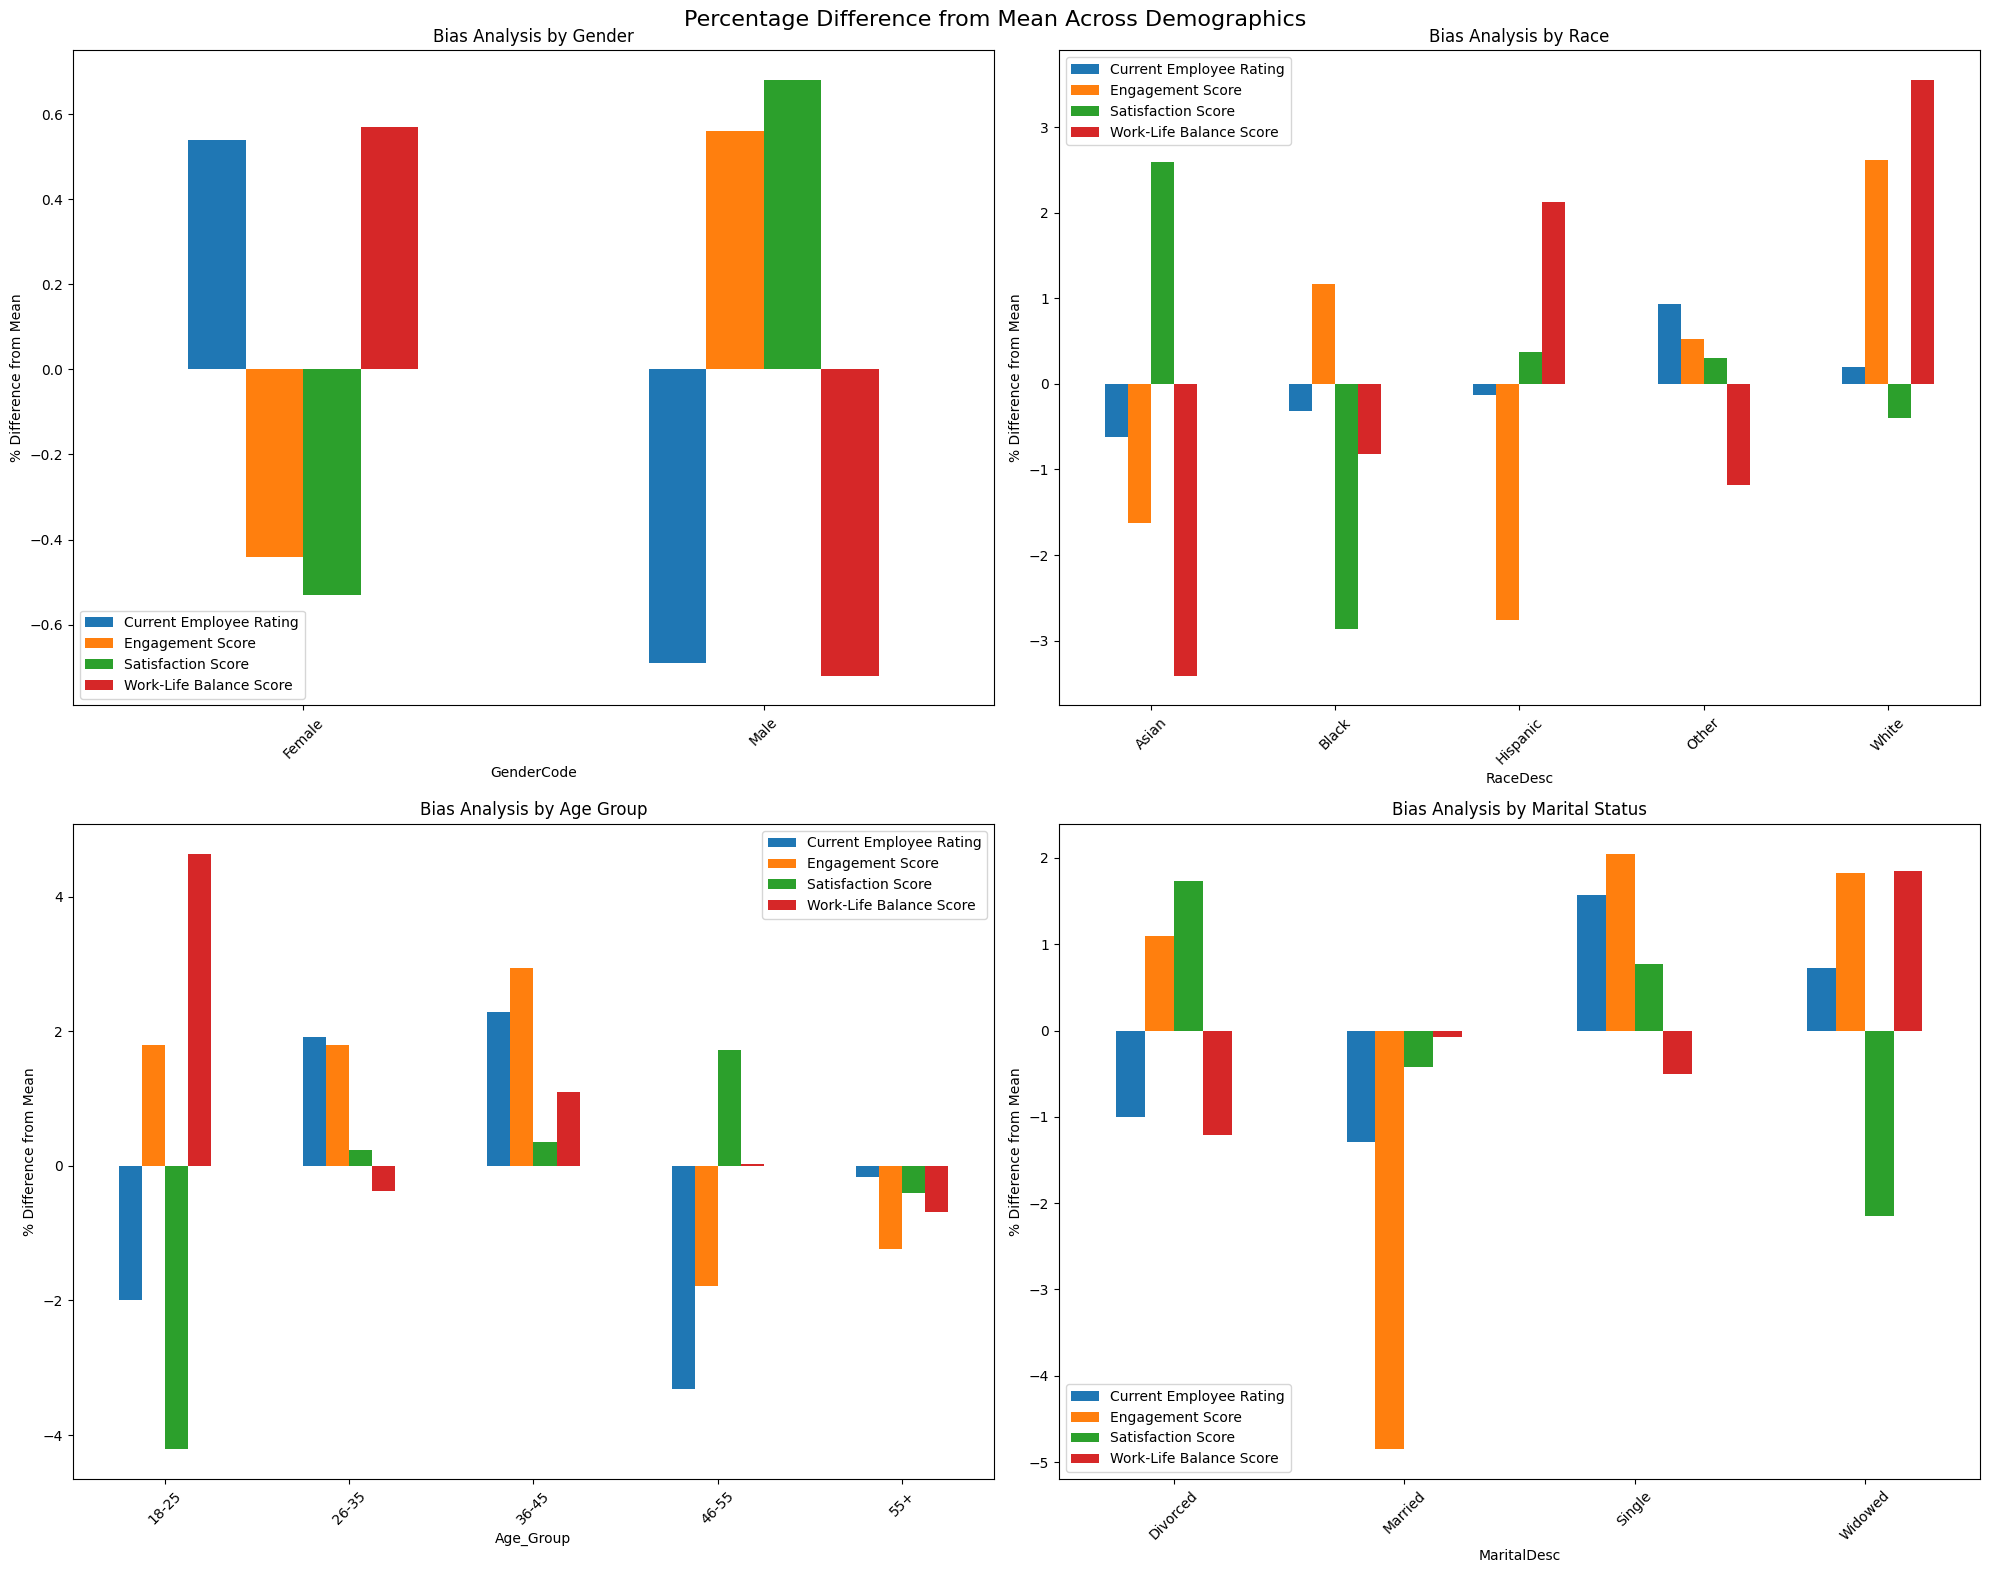

In [26]:
# Create a function to analyze bias across different metrics
def analyze_bias(df, group_col, metrics):
    bias_analysis = {}
    
    for metric in metrics:
        # Calculate mean values for each group
        group_means = df.groupby(group_col, observed=True)[metric].mean()
        
        # Calculate overall mean
        overall_mean = df[metric].mean()
        
        # Calculate percentage difference from overall mean
        pct_diff = ((group_means - overall_mean) / overall_mean * 100).round(2)
        
        bias_analysis[metric] = pct_diff
        
    return pd.DataFrame(bias_analysis)

# Define metrics to analyze
metrics_to_analyze = ['Current Employee Rating', 'Engagement Score', 
                     'Satisfaction Score', 'Work-Life Balance Score']

# Analyze bias by different demographic factors
gender_bias = analyze_bias(df, 'GenderCode', metrics_to_analyze)
race_bias = analyze_bias(df, 'RaceDesc', metrics_to_analyze)
age_bias = analyze_bias(df, 'Age_Group', metrics_to_analyze)
marital_bias = analyze_bias(df, 'MaritalDesc', metrics_to_analyze)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Percentage Difference from Mean Across Demographics', fontsize=16)

# Gender bias plot
gender_bias.plot(kind='bar', ax=axes[0,0], title='Bias Analysis by Gender')
axes[0,0].set_ylabel('% Difference from Mean')
axes[0,0].tick_params(axis='x', rotation=45)

# Race bias plot
race_bias.plot(kind='bar', ax=axes[0,1], title='Bias Analysis by Race')
axes[0,1].set_ylabel('% Difference from Mean')
axes[0,1].tick_params(axis='x', rotation=45)

# Age bias plot
age_bias.plot(kind='bar', ax=axes[1,0], title='Bias Analysis by Age Group')
axes[1,0].set_ylabel('% Difference from Mean')
axes[1,0].tick_params(axis='x', rotation=45)

# Marital status bias plot
marital_bias.plot(kind='bar', ax=axes[1,1], title='Bias Analysis by Marital Status')
axes[1,1].set_ylabel('% Difference from Mean')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [27]:
from scipy import stats
import pandas as pd
import numpy as np

def check_significance(df, group_col, metric):
    groups = sorted(df[group_col].unique())  # Sort groups for consistent comparison
    results = []
    
    # Validate inputs
    if metric not in df.columns:
        raise ValueError(f"Metric '{metric}' not found in dataframe")
    if group_col not in df.columns:
        raise ValueError(f"Group column '{group_col}' not found in dataframe")
    
    for i, g1 in enumerate(groups):
        for g2 in groups[i+1:]:  # More efficient way to avoid duplicates
            group1_data = df[df[group_col] == g1][metric].dropna()
            group2_data = df[df[group_col] == g2][metric].dropna()
            
            # Only perform test if both groups have data
            if len(group1_data) > 0 and len(group2_data) > 0:
                stat, pvalue = stats.ttest_ind(group1_data, group2_data)
                mean_diff = group1_data.mean() - group2_data.mean()
                results.append({
                    'Group 1': g1,
                    'Group 2': g2,
                    'Metric': metric,
                    'p-value': pvalue,
                    'Mean Difference': round(mean_diff, 3),
                    'Group 1 Size': len(group1_data),
                    'Group 2 Size': len(group2_data)
                })
    
    return pd.DataFrame(results)

# Define metrics to analyze
metrics_to_analyze = ['Current Employee Rating', 'Engagement Score', 
                     'Satisfaction Score', 'Work-Life Balance Score']

# Perform significance testing
demographic_factors = ['GenderCode', 'RaceDesc', 'Age_Group', 'MaritalDesc']
significant_differences = []

for factor in demographic_factors:
    print(f"\nAnalyzing {factor}...")
    for metric in metrics_to_analyze:
        try:
            results = check_significance(df, factor, metric)
            # Filter for statistically significant differences (p < 0.05)
            significant = results[results['p-value'] < 0.05].copy()  # Use copy to avoid warning
            if not significant.empty:
                significant['Demographic Factor'] = factor
                significant_differences.append(significant)
        except Exception as e:
            print(f"Error analyzing {factor} - {metric}: {str(e)}")

if significant_differences:
    significant_df = pd.concat(significant_differences)
    print("\nStatistically Significant Differences (p < 0.05):")
    # Format the output for better readability
    print(significant_df.sort_values('p-value')[
        ['Demographic Factor', 'Metric', 'Group 1', 'Group 2', 
         'Mean Difference', 'p-value', 'Group 1 Size', 'Group 2 Size']
    ].to_string())
else:
    print("\nNo statistically significant differences found.")


Analyzing GenderCode...

Analyzing RaceDesc...

Analyzing Age_Group...

Analyzing MaritalDesc...

Statistically Significant Differences (p < 0.05):
  Demographic Factor                   Metric   Group 1   Group 2  Mean Difference   p-value  Group 1 Size  Group 2 Size
3        MaritalDesc         Engagement Score   Married    Single           -0.203  0.005793           764           772
4        MaritalDesc         Engagement Score   Married   Widowed           -0.196  0.007740           764           723
3           RaceDesc  Work-Life Balance Score     Asian     White           -0.208  0.009617           629           599
5          Age_Group  Current Employee Rating     26-35     46-55            0.155  0.011987           546           487
7          Age_Group  Current Employee Rating     36-45     46-55            0.166  0.012225           460           487
0        MaritalDesc         Engagement Score  Divorced   Married            0.175  0.017906           741           764
0   

In [126]:
# Save processed dataframe to CSV
output_path = "data/processed/processed_employee_data.csv"
df.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")


Processed data saved to: data/processed/processed_employee_data.csv


**5. Model selection process and parameter tuning**

**Stratified test set**

In [123]:
# Remove 'Future Start' status and prepare data
df_model = df[(df['EmployeeStatus'] != 'Future Start') & (df['EmployeeStatus'] != 'Leave of Absence')].copy()

# Select features that would be known/relevant for predicting employee status
features = ['Age', 'Current Employee Rating', 'Engagement Score', 
           'Satisfaction Score', 'Work-Life Balance Score',
           'GenderCode', 'RaceDesc', 'MaritalDesc', 'State',
           'JobFunctionDescription', 'EmployeeClassificationType',
           'BusinessUnit', 'DepartmentType', 'Division']

# Target variable
target = 'EmployeeStatus'

# Prepare X and y
X = df_model[features]
y = df_model[target]

# Create a combined group string to avoid mixing types
X['group'] = (
    X['GenderCode'] + '_' + 
    X['RaceDesc']# + '_' + 
    #df_model['MaritalDesc'] + '_'# + 
    #df_model['Age_Group'].astype(str) + '_' + 
    #df_model['Seniority'].astype(str)
)

print(X['group'].nunique())
X['group'].value_counts()


10


C:\Users\Ana Belen\AppData\Local\Temp\ipykernel_980\1059009713.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['group'] = (


group
Female_Asian       331
Female_White       330
Female_Black       322
Female_Other       303
Female_Hispanic    302
Male_Asian         267
Male_Black         257
Male_Other         253
Male_White         242
Male_Hispanic      238
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_oos_test, y_train, y_oos_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=X['group'])
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=X_train['group'])

In [30]:
#from sklearn.model_selection import StratifiedGroupKFold
#
## Initialize StratifiedGroupKFold
#sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
#
## Print fold information
#print("\nStratified Group K-Fold split information:")
#folds = sgkf.split(X, y, groups)
#for fold, (train_idx, test_idx) in enumerate(folds):
#    print(f"\nFold {fold + 1}:")
#    print(f"Train size: {len(train_idx)}, Test size: {len(test_idx)}")
#    print(f"Target distribution in train: \n{y.iloc[train_idx].value_counts(normalize=True).round(3)}")
#    print(f"Target distribution in test: \n{y.iloc[test_idx].value_counts(normalize=True).round(3)}")


**Pipeline**

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import classification_report

# Define feature types
numeric_features = ['Age', 'Current Employee Rating', 'Engagement Score', 
                   'Satisfaction Score', 'Work-Life Balance Score']

categorical_features = ['GenderCode', 'RaceDesc', 'MaritalDesc', 'State',
                       'JobFunctionDescription', 'EmployeeClassificationType',
                       'BusinessUnit', 'DepartmentType', 'Division']

calibrated_forest = CalibratedClassifierCV(
   estimator=RandomForestClassifier(random_state=1993))

# Create preprocessor - removed 'sparse' parameter
preprocessor = ColumnTransformer(
    transformers=[
        #('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist', min_frequency=0.1, max_categories=10), 
         categorical_features)
    ])

# Create pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', calibrated_forest)
])

# Encode target variable
#le = LabelEncoder()
#y_train_encoded = le.fit_transform(y_train_final)
#y_val_encoded = le.transform(y_val)


In [77]:
rf_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist',
                                                                max_categories=10,
                                                                min_frequency=0.1),
                                                  ['GenderCode', 'RaceDesc',
                                                   'MaritalDesc', 'State',
                                                   'JobFunctionDescription',
                                                   'EmployeeClassificationType',
                                                   'BusinessUnit',
                                                   'DepartmentType',
                                                   'Division'])])),
                ('classifier',
                 CalibratedClassifierCV(estimator=RandomForestClassifier(random_state=1993)))])

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__estimator__max_depth': [2, 6, 8],
    'classifier__estimator__min_samples_split': [2, 5],
    'classifier__estimator__min_samples_leaf': [5, 10, 20],
    'classifier__estimator__n_estimators': [50, 100, 300, 500],
}

search = GridSearchCV(rf_pipeline, param_grid, cv=3)

search.fit(X_train_final, y_train_final)


c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\prepr

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='infrequent_if_exist',
                                                                                       max_categories=10,
                                                                                       min_frequency=0.1),
                                                                         ['GenderCode',
                                                                          'RaceDesc',
                                                                          'MaritalDesc',
                                                                          'State',
                                                                          'JobFunctionDescription',
                                                                          'EmployeeClassificationType',
                                                                          'BusinessUnit',
                                                                          'DepartmentType',
                                                                          'Division'])])),
                                       ('classifier',
                                        CalibratedClassifierCV(estimator=RandomForestClassifier(random_state=1993)))]),
             param_grid={'classifier__estimator__max_depth': [2, 6, 8],
                         'classifier__estimator__min_samples_leaf': [5, 10, 20],
                         'classifier__estimator__min_samples_split': [2, 5],
                         'classifier__estimator__n_estimators': [50, 100, 300,
                                                                 500]})

In [81]:
y_train_final.value_counts()

EmployeeStatus
Active                    1987
Voluntarily Terminated     268
Leave of Absence            67
Terminated for Cause        51
Name: count, dtype: int64

In [80]:
search.best_params_

{'classifier__estimator__max_depth': 2,
 'classifier__estimator__min_samples_leaf': 5,
 'classifier__estimator__min_samples_split': 2,
 'classifier__estimator__n_estimators': 50}

In [92]:
search.best_estimator_.classes_

array(['Active', 'Leave of Absence', 'Terminated for Cause',
       'Voluntarily Terminated'], dtype=object)

In [116]:
search.best_estimator_.predict_proba(X_oos_test)

c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.95921449, 0.01378234, 0.00791772, 0.01908545],
       [0.80124627, 0.03509505, 0.01764472, 0.14601396],
       [0.96044885, 0.01367297, 0.01065344, 0.01522475],
       ...,
       [0.79812981, 0.04072948, 0.0169724 , 0.14416831],
       [0.91466257, 0.01691287, 0.02047375, 0.04795082],
       [0.79351807, 0.03957152, 0.01739135, 0.14951906]])

In [122]:
y_oos_test[np.sum(search.best_estimator_.predict_proba(X_oos_test)[:,2:], axis=1) > 0.18]

c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


750                     Active
699     Voluntarily Terminated
2789                    Active
1587                    Active
707     Voluntarily Terminated
1475                    Active
1079                    Active
1913    Voluntarily Terminated
2958                    Active
2583          Leave of Absence
2697          Leave of Absence
1485                    Active
1632    Voluntarily Terminated
1720                    Active
1944                    Active
2530                    Active
2873                    Active
668                     Active
1579                    Active
1626                    Active
850                     Active
1575    Voluntarily Terminated
736                     Active
144     Voluntarily Terminated
1016                    Active
Name: EmployeeStatus, dtype: object

In [109]:
import numpy as np

np.sum(search.best_estimator_.predict_proba(X_oos_test)[:,2:], axis=1).mean()
np.sum(search.best_estimator_.predict_proba(X_oos_test)[:,2:], axis=1).max()

c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


np.float64(0.2045219779486315)

In [113]:
np.sum(search.best_estimator_.predict_proba(X_oos_test)[:,2:], axis=1) > 0.15

c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
        True, False, False,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,

In [32]:
# Print results
print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred, 
                          target_names=le.classes_))

# Feature importance
feature_names = (numeric_features + 
                [f"{feat}_{val}" for feat, vals in 
                 zip(categorical_features, 
                     preprocessor.named_transformers_['cat'].categories_) 
                 for val in vals[1:]])

importances = pd.DataFrame(
    {'feature': feature_names,
     'importance': rf_pipeline.named_steps['classifier'].feature_importances_}
)
print("\nTop 10 Most Important Features:")
print(importances.sort_values('importance', ascending=False).head(10))


Classification Report:
                        precision    recall  f1-score   support

                Active       0.84      1.00      0.91       222
      Leave of Absence       0.00      0.00      0.00         5
  Terminated for Cause       0.00      0.00      0.00        10
Voluntarily Terminated       0.00      0.00      0.00        27

              accuracy                           0.84       264
             macro avg       0.21      0.25      0.23       264
          weighted avg       0.71      0.84      0.77       264


Top 10 Most Important Features:
                                  feature  importance
0                                     Age    0.102442
3                      Satisfaction Score    0.057990
2                        Engagement Score    0.057342
4                 Work-Life Balance Score    0.056166
1                 Current Employee Rating    0.048835
5                         GenderCode_Male    0.027691
120  EmployeeClassificationType_Part-Time    0.023

c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ana Belen\AppData\Local\pypoetry\Cache\virtualenvs\final_project-nwGlnT8A-py3.12\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

**Parameter tunning**

In [ ]:
# 5. Save Best Models (optional)
import joblib

joblib.dump(rf_random.best_estimator_, 'best_random_forest.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')
joblib.dump(le, 'label_encoder.joblib')